# Project: Investigate a dataset from The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## **Introduction**

The following is an analysis of a database from The Movie Database (TMDb) which contains information on more than 10,000 films, separated into 21 columns:

* id: film identification number
* imdb_id: film identification number from The Movie Database (TMDb)
* popularity: metric used to measure the popularity of a film. (https://developers.themoviedb.org/3/getting-started/popularity)
* budget
* revenue
* original_title: original film name
* cast
* homepage
* director
* tagline: caption used to publicize the film
* keywords
* overview
* runtime
* genres
* production_companies
* release_date
* vote_count: number of votes of opinion about the film
* vote_average: average movie rating (from 0 to 10)
* release_year
* budget_adj: budget associated of the associated movie, in terms of 2010 dollars (accounting for inflation over time)
* revenue_adj: revenue associated of the associated movie, in terms of 2010 dollars (accounting for inflation over time)


The file to analyze contain:

* Total Rows = 10866
* Total Columns = 21
* After Seeing the dataset we can say that some columns is contain null values and duplicated


### * Which answers will be answered?

The <a href="#eda">Exploratory Data Analysis</a> is separated into 5 parts:
<ul>
<li><a href="#a_genres">About genres</a></li>
<li><a href="#a_movies">About movies</a></li>
<li><a href="#a_pop">About popularity</a></li>
<li><a href="#a_budget">About revenue, budget and profits</a></li>
<li><a href="#a_others">Other interesting data</a></li>
</ul>

Each of these items answers questions about the item you are viewing. There are a total of 21 questions.

<ul>
<li><a href="#1">What are the most popular genres?</a></li>
<li><a href="#2">Genre classification by year</a></li>
<li><a href="#3">Genre classification by popularity</a></li>
<li><a href="#4">What are the films with the longest running time?</a></li>
<li><a href="#5">What are the films with the shortest running time?</a></li>
<li><a href="#6">How has the length of films evolved over time?</a></li>
<li><a href="#7">Does the length of the film affect popularity?</a></li>
<li><a href="#8">What are the most popular movies?</a></li>  
<li><a href="#9">Does the release year affect popularity?</a></li>
<li><a href="#10">Does higher revenue ensure greater popularity?</a></li>
<li><a href="#11">Popularity by director and cast</a></li>
<li><a href="#12">Films with higher/lower profits</a></li>
<li><a href="#13"> Does a higher budget ensure a higher profit?</a></li>
<li><a href="#14">Relationship between budget and revenues</a></li>
<li><a href="#15">Profits over the years</a></li>
<li><a href="#16">Budget over the years</a></li> 
<li><a href="#17">Revenue over the years</a></li>
<li><a href="#18">Number of films made by year</a></li>
<li><a href="#19">Which actors have appeared in the most films?</a></li>
<li><a href="#20">Which directors have directed the most films?</a></li>
<li><a href="#21">Which production companies have directed the films?</a></li>
</ul>



### * *Import libraries*
The libraries to be used are imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## **Data Wrangling**

In this section, the data is loaded, checked for cleanliness, and then the data set is arranged for analysis.

### * *General Properties*
The file is read and analyzed.

In [2]:
#Csv file is imported
df = pd.read_csv("tmdb-movies.csv")

#We see the first rows of the file
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### * *Evaluate the dataframe*
The dataframe and the information it holds are analyzed..

In [3]:
print("The dataframe contains {} rows and columns".format(df.shape))

The dataframe contains (10866, 21) rows and columns


In [4]:
print("Has {} duplicated element".format(df.duplicated().sum()))

Has 1 duplicated element


In [5]:
print("Numbers of NaN/Null data:\n")
df.isnull().sum()

Numbers of NaN/Null data:



id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
print("Types of data:\n")
df.dtypes

Types of data:



id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### * *Cleaning data*
When the original dataframe is analyzed, it is possible to observe that there are many columns that are irrelevant to our study, so a new dataframe will be created with the columns arranged for proper understanding, and on which the cleaning process will begin.

In [7]:
#Dataframe "df_fixed" only contains the columns that we will use, this is done to save the original dataframe.
df_fixed = df[["original_title","director","cast","genres","production_companies","release_year","runtime","vote_count","vote_average","popularity","budget","revenue","budget_adj","revenue_adj"]]
df_fixed.head()

,original_title,director,cast,genres,production_companies,release_year,runtime,vote_count,vote_average,popularity,budget,revenue,budget_adj,revenue_adj
0,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,124,5562,6.5,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,120,6185,7.1,28.419936,150000000,378436354,1.379999e+08,3.481613e+08
2,Insurgent,Robert Schwentke,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,119,2480,6.3,13.112507,110000000,295238201,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,J.J. Abrams,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,136,5292,7.5,11.173104,200000000,2068178225,1.839999e+08,1.902723e+09
4,Furious 7,James Wan,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,137,2947,7.3,9.335014,190000000,1506249360,1.747999e+08,1.385749e+09


In [8]:
print("The new dataframe has", df_fixed.shape, "rows and columns")

The new dataframe has (10866, 14) rows and columns


In [9]:
print("The new dataframe has {} elements repeated".format(df_fixed.duplicated().sum()))

The new dataframe has 1 elements repeated


In [10]:
print("Elements Nan/null:\n")
df_fixed.isnull().sum()

Elements Nan/null:



original_title             0
director                  44
cast                      76
genres                    23
production_companies    1030
release_year               0
runtime                    0
vote_count                 0
vote_average               0
popularity                 0
budget                     0
revenue                    0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
print("Types of data:\n")
df_fixed.dtypes

Types of data:



original_title           object
director                 object
cast                     object
genres                   object
production_companies     object
release_year              int64
runtime                   int64
vote_count                int64
vote_average            float64
popularity              float64
budget                    int64
revenue                   int64
budget_adj              float64
revenue_adj             float64
dtype: object

There are a total of 10866 data, and those that are of type "int" or "float" are not with NaN/null values. Since it is difficult to create a replacement criterion for "str" values, and the fact that there are so few data, it has been decided to eliminate those rows containing this data in the "director", "genres" and "cast" columns (the "production_companies" column is left with null values in this moment, since there are too many to eliminate, and its Nan/null values do not influence the studies).

In [12]:
# A new dataframe called "dff" is made with the arranged data.
dff = df_fixed.drop_duplicates().dropna(subset=["director", "genres", "cast"])
dff.shape

(10731, 14)

As can be seen, only a total of 135 data is lost (equivalent to only 1.24% of the total data), which indicates that it is a good decision (according to the author of this analysis).

We will add the "Profit" column, which is the result of "revenue" - "budget"

In [13]:
dff["profit"] = dff["revenue"] - dff["budget"]
dff.head()

,original_title,director,cast,genres,production_companies,release_year,runtime,vote_count,vote_average,popularity,budget,revenue,budget_adj,revenue_adj,profit
0,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,124,5562,6.5,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,1363528810
1,Mad Max: Fury Road,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,120,6185,7.1,28.419936,150000000,378436354,1.379999e+08,3.481613e+08,228436354
2,Insurgent,Robert Schwentke,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,119,2480,6.3,13.112507,110000000,295238201,1.012000e+08,2.716190e+08,185238201
3,Star Wars: The Force Awakens,J.J. Abrams,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,136,5292,7.5,11.173104,200000000,2068178225,1.839999e+08,1.902723e+09,1868178225
4,Furious 7,James Wan,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,137,2947,7.3,9.335014,190000000,1506249360,1.747999e+08,1.385749e+09,1316249360


There are 4 columns with multidata cells separated only by "|" ("director, "cast", "genres" and "production_companies"). To separate this data, we will create temporary dataframes that will help us analyze this specific data.

In [14]:
###Procedure to filter "genres" column.

# Create a copy (called "df_split_genre") of the clean dataframe (called "dff")
df_split_genre = dff.copy()

# From the copied dataframe, i create a column with the data of the old "genre" column but separated.
split_genre = df_split_genre["genres"].str.split("|").apply(pd.Series, 1).stack().reset_index(level=1, drop=True)

#Rename the new column
split_genre.name = "genre_split"

#I delete the old "genre" column and add the new column with the fixed data.
df_split_genre = df_split_genre.drop(["genres"], axis=1).join(split_genre)

#Show the dataframe
df_split_genre.head()

,original_title,director,cast,production_companies,release_year,runtime,vote_count,vote_average,popularity,budget,revenue,budget_adj,revenue_adj,profit,genre_split
0,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Universal Studios|Amblin Entertainment|Legenda...,2015,124,5562,6.5,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,1363528810,Action
0,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Universal Studios|Amblin Entertainment|Legenda...,2015,124,5562,6.5,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,1363528810,Adventure
0,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Universal Studios|Amblin Entertainment|Legenda...,2015,124,5562,6.5,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,1363528810,Science Fiction
0,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Universal Studios|Amblin Entertainment|Legenda...,2015,124,5562,6.5,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,1363528810,Thriller
1,Mad Max: Fury Road,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Village Roadshow Pictures|Kennedy Miller Produ...,2015,120,6185,7.1,28.419936,150000000,378436354,1.379999e+08,3.481613e+08,228436354,Action


In [15]:
#Comprobation about the dataframe
df_split_genre.isnull().sum() #No Nan/null data (except the production companies)
df_split_genre.info()
df_split_genre.shape #Has 26753 rows and 14 columns
sum(df_split_genre.duplicated()) #No duplicated data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26753 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        26753 non-null  object 
 1   director              26753 non-null  object 
 2   cast                  26753 non-null  object 
 3   production_companies  24650 non-null  object 
 4   release_year          26753 non-null  int64  
 5   runtime               26753 non-null  int64  
 6   vote_count            26753 non-null  int64  
 7   vote_average          26753 non-null  float64
 8   popularity            26753 non-null  float64
 9   budget                26753 non-null  int64  
 10  revenue               26753 non-null  int64  
 11  budget_adj            26753 non-null  float64
 12  revenue_adj           26753 non-null  float64
 13  profit                26753 non-null  int64  
 14  genre_split           26753 non-null  object 
dtypes: float64(4), int6

0

In [16]:
###Procedure to filter "cast" column.

# Create a copy (called "df_split_cast") of the clean dataframe (called "dff")
df_split_cast = dff.copy()

# From the copied dataframe, i create a column with the data of the old "cast" column but separated.
split_cast = df_split_cast['cast'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)

#Rename the new column
split_cast.name = 'cast_split'

#I delete the old "cast" column and add the new column with the fixed data
df_split_cast = df_split_cast.drop(['cast'], axis=1).join(split_cast)

#Show the dataframe
df_split_cast.head()

,original_title,director,genres,production_companies,release_year,runtime,vote_count,vote_average,popularity,budget,revenue,budget_adj,revenue_adj,profit,cast_split
0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,124,5562,6.5,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,1363528810,Chris Pratt
0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,124,5562,6.5,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,1363528810,Bryce Dallas Howard
0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,124,5562,6.5,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,1363528810,Irrfan Khan
0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,124,5562,6.5,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,1363528810,Vincent D'Onofrio
0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,124,5562,6.5,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,1363528810,Nick Robinson


In [17]:
#Comprobation about the dataframe
df_split_cast.isnull().sum() #No Nan/null data (except the production companies)
df_split_cast.info()
df_split_cast.shape #Has 52334 rows and 14 columns
sum(df_split_genre.duplicated()) #No duplicated data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52334 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        52334 non-null  object 
 1   director              52334 non-null  object 
 2   genres                52334 non-null  object 
 3   production_companies  48020 non-null  object 
 4   release_year          52334 non-null  int64  
 5   runtime               52334 non-null  int64  
 6   vote_count            52334 non-null  int64  
 7   vote_average          52334 non-null  float64
 8   popularity            52334 non-null  float64
 9   budget                52334 non-null  int64  
 10  revenue               52334 non-null  int64  
 11  budget_adj            52334 non-null  float64
 12  revenue_adj           52334 non-null  float64
 13  profit                52334 non-null  int64  
 14  cast_split            52334 non-null  object 
dtypes: float64(4), int6

0

In [18]:
###Procedure to filter "director" column.

# Create a copy (called "df_split_director") of the clean dataframe (called "dff")
df_split_director = dff.copy()

# From the copied dataframe, i create a column with the data of the old "director" column but separated.
split_director = df_split_director['director'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)

#Rename the new column
split_director.name = 'director_split'

#I delete the old "director" column and add the new column with the fixed data
df_split_director = df_split_director.drop(['director'], axis=1).join(split_director)

#Show the dataframe
df_split_director.head()

,original_title,cast,genres,production_companies,release_year,runtime,vote_count,vote_average,popularity,budget,revenue,budget_adj,revenue_adj,profit,director_split
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,124,5562,6.5,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,1363528810,Colin Trevorrow
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,120,6185,7.1,28.419936,150000000,378436354,1.379999e+08,3.481613e+08,228436354,George Miller
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,119,2480,6.3,13.112507,110000000,295238201,1.012000e+08,2.716190e+08,185238201,Robert Schwentke
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,136,5292,7.5,11.173104,200000000,2068178225,1.839999e+08,1.902723e+09,1868178225,J.J. Abrams
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,137,2947,7.3,9.335014,190000000,1506249360,1.747999e+08,1.385749e+09,1316249360,James Wan


In [19]:
#Comprobation about the dataframe
df_split_director.isnull().sum() #No Nan/null data (except the production companies)
df_split_director.info()
df_split_director.shape #Has 11774 rows and 14 columns
sum(df_split_director.duplicated()) #No duplicated data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11774 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        11774 non-null  object 
 1   cast                  11774 non-null  object 
 2   genres                11774 non-null  object 
 3   production_companies  10708 non-null  object 
 4   release_year          11774 non-null  int64  
 5   runtime               11774 non-null  int64  
 6   vote_count            11774 non-null  int64  
 7   vote_average          11774 non-null  float64
 8   popularity            11774 non-null  float64
 9   budget                11774 non-null  int64  
 10  revenue               11774 non-null  int64  
 11  budget_adj            11774 non-null  float64
 12  revenue_adj           11774 non-null  float64
 13  profit                11774 non-null  int64  
 14  director_split        11774 non-null  object 
dtypes: float64(4), int6

0

In [20]:
###Procedure to filter "production" column.

# Create a copy (called "df_split_production") of the clean dataframe (called "dff")
df_split_production = dff.copy()

# From the copied dataframe, i create a column with the data of the old "production_companies" column but separated.
split_production = df_split_production['production_companies'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)

#Rename the new column
split_production.name = 'production_split'

#I delete the old "production_companies" column and add the new column with the fixed data
df_split_production = df_split_production.drop(['production_companies'], axis=1).join(split_production)

#Show the dataframe
df_split_production.head()

,original_title,director,cast,genres,release_year,runtime,vote_count,vote_average,popularity,budget,revenue,budget_adj,revenue_adj,profit,production_split
0,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,2015,124,5562,6.5,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,1363528810,Universal Studios
0,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,2015,124,5562,6.5,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,1363528810,Amblin Entertainment
0,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,2015,124,5562,6.5,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,1363528810,Legendary Pictures
0,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,2015,124,5562,6.5,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,1363528810,Fuji Television Network
0,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,2015,124,5562,6.5,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,1363528810,Dentsu


In [21]:
# Comprobation about the dataframe
df_split_production.isnull().sum() #Has 959 NaN/nuLL data from "production_split"
sum(df_split_director.duplicated()) #No duplicated data

# Because they are "str" elements and less than 10% of the total data, Nan/null elements will be eliminated.
df_split_production.dropna(inplace = True)
df_split_production.isnull().sum() #Now has 0 Nan/null data

df_split_production.shape #Has 23143 rows and 14 columns

(23143, 15)

### * *Summary*

We currently have 5 dataframes:

* dff                 : original dataframe with clean data.
* df_split_genre      : dataframe with the "genre" data fixed
* df_split_cast       : dataframe with the "cast" data fixed
* df_split_director   : dataframe with the "director" data fixed
* df_split_production : dataframe with the "production_companies" data fixed
   


<a id='eda'></a>
## **Exploratory Data Analysis**

> With the data arranged, we proceed to analyze each aspect of the movie database.

<a id='a_genres'></a>
### * About genres

<a id='1'></a>
### *What are the most popular genres?*

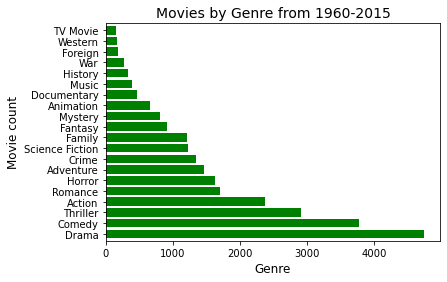

In [22]:
df_split_genre['genre_split'].value_counts().plot(kind='barh', color='g', width = 0.8)
plt.title('Movies by Genre from 1960-2015', size=14)
plt.xlabel('Genre', size=12)
plt.ylabel('Movie count', size=12);

> The majority of the films are of the "Drama" genre, while the least amount are classified as "TV Movie".

<a id='2'></a>
### Genre classification by year

In [23]:
genres_year = df_split_genre.groupby(['release_year'])['genre_split'].value_counts()
genres_year.groupby(level=0).nlargest(1).reset_index(level=0, drop=True)

release_year  genre_split
1960          Drama           13
1961          Drama           16
1962          Drama           21
1963          Comedy          13
1964          Drama           20
1965          Drama           20
1966          Comedy          16
1967          Comedy          17
1968          Drama           19
1969          Drama           13
1970          Drama           19
1971          Drama           30
1972          Drama           16
1973          Drama           31
1974          Drama           21
1975          Drama           17
1976          Drama           22
1977          Drama           23
1978          Drama           29
1979          Drama           30
1980          Drama           32
1981          Drama           32
1982          Drama           33
1983          Drama           35
1984          Drama           40
1985          Comedy          51
1986          Drama           51
1987          Comedy          57
1988          Comedy          69
1989          Com

> Although most of the years the "Drama" genre has predominated in the industry, it's interesting to see that in the years 1963, 1966, 1967, 1985, 1987, 1988, 1989, 1994, 2001, 2003 "Comedy" genre won.

<a id='3'></a>
### Genre classification by popularity


In [24]:
genres_pop = df_split_genre.groupby(['release_year','genre_split'])['popularity'].mean()
genres_pop.groupby(level=0).nlargest(1).reset_index(level=0, drop=True)

release_year  genre_split    
1960          Thriller           0.811910
1961          Animation          2.631987
1962          Adventure          0.942513
1963          Animation          2.180410
1964          War                0.930959
1965          Music              0.968850
1966          Animation          0.585717
1967          Animation          2.550704
1968          Mystery            1.519456
1969          Crime              0.948020
1970          Animation          1.127718
1971          Family             1.530722
1972          Crime              1.072768
1973          Animation          0.956526
1974          Mystery            0.702035
1975          Adventure          0.880297
1976          Crime              0.707249
1977          Action             1.419319
1978          Music              0.679805
1979          Action             1.410014
1980          Science Fiction    0.897143
1981          Adventure          0.875815
1982          War                1.143183
1983

> Despite the fact that the "drama" genre predominates in the industry, it's incredible to see that in popularity, it's not even selected, being the "Adventure" genre the most popular.

<a id='a_movies'></a>
### * About Movies

<a id='4'></a>
### *What are the films with the longest running time?*

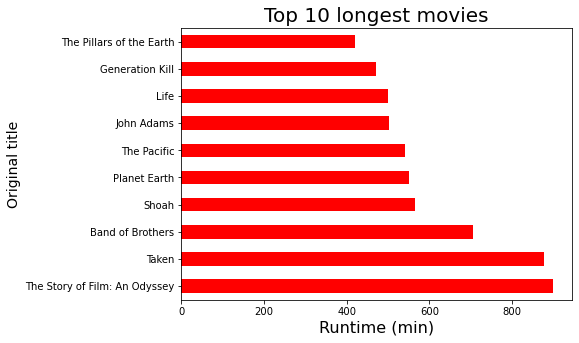

In [25]:
#We have the "runtime" and "original_title" column of the "dff" dataframe sorted from highest to lowest
#display the first 10 results and store it in the "longtime" variable
longtime = pd.DataFrame(dff['runtime'].sort_values(ascending = False))
longtime['original_title'] = dff['original_title']
longtime = longtime.head(10)

#Plot the data
longtime.plot(x="original_title", y="runtime", kind="barh",figsize=(7,5), color="r", legend=None )
plt.title('Top 10 longest movies',fontsize = 20)
plt.xlabel("Runtime (min)", fontsize = 16)
plt.ylabel('Original title', fontsize = 14);

In [26]:
longtime

,runtime,original_title
3894,900,The Story of Film: An Odyssey
4041,877,Taken
2722,705,Band of Brothers
6176,566,Shoah
6894,550,Planet Earth
2214,540,The Pacific
3356,501,John Adams
1865,500,Life
3141,470,Generation Kill
2170,421,The Pillars of the Earth


> As can be seen, the 10 longest films have durations over 7 hours . The longest movie is 15 hours long!!!!! (prepare your body if you want to watch these movies in one sitting).

<a id='5'></a>
### *What are the films with the shortest running time?*

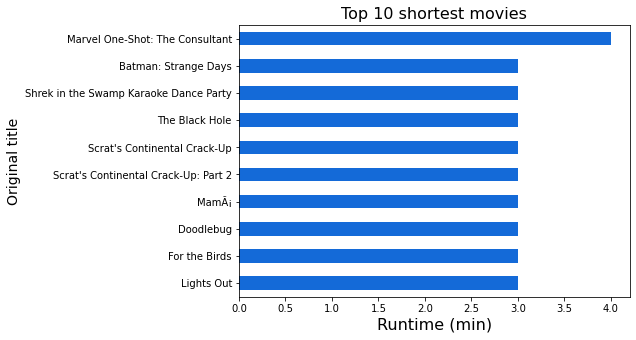

In [27]:
#We have the "runtime" and "original_title" column of the "dff" dataframe sorted from lowest to highest
#display the first 10 results and store it in the "shorttime" variable
shortime = pd.DataFrame(dff['runtime'].sort_values(ascending = True))
shortime['original_title'] = dff['original_title']
shortime = shortime.drop(shortime[shortime['runtime'] == 0].index)
shortime = shortime.head(10)

#Plot the data
shortime.plot(x="original_title", y="runtime", kind="barh",figsize=(7,5), color="#146AD8", legend=None)
plt.title('Top 10 shortest movies',fontsize = 16)
plt.xlabel("Runtime (min)", fontsize = 16)
plt.ylabel('Original title', fontsize = 14);


In [28]:
shortime

,runtime,original_title
5993,3,Lights Out
8706,3,For the Birds
5399,3,Doodlebug
3298,3,MamÃ¡
3891,3,Scrat's Continental Crack-Up: Part 2
2232,3,Scrat's Continental Crack-Up
3350,3,The Black Hole
2830,3,Shrek in the Swamp Karaoke Dance Party
1112,3,Batman: Strange Days
3656,4,Marvel One-Shot: The Consultant


> With the exception of the films whose running time is recorded as 0 minutes, the shorter films are only 3 minutes long (you could watch them while reviewing this report).

<a id='6'></a>
### *How has the length of films evolved over time?*

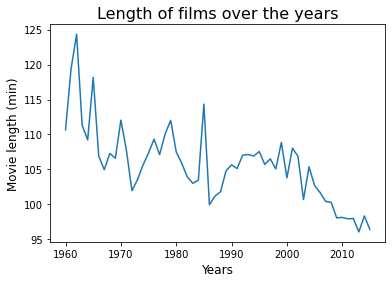

In [29]:
#We group the mean runtime by release_year, and save it into the runtime variable
runtime = df.groupby(['release_year'])['runtime'].mean()

#Plot the data
plt.plot(runtime)
plt.title('Length of films over the years',fontsize = 16)
plt.xlabel('Years', size=12)
plt.ylabel('Movie length (min)', size=12);


> A downward trend can be observed in the length of films as the years go by. (lazy directors?)

<a id='a_pop'></a>
### * **About popularity**

<a id='7'></a>
### *Does the length of the film affect popularity?*

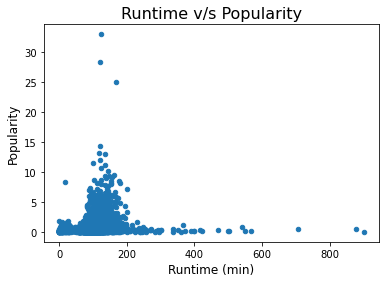

In [30]:
#Plot the data from dff dataframe
dff.plot(x='runtime', y='popularity', kind='scatter')
plt.title('Runtime v/s Popularity',fontsize = 16)
plt.xlabel('Runtime (min)', size=12)
plt.ylabel('Popularity', size=12);

> It is possible to observe that films between 100 and 200 minutes have a tendency to be more popular than the others (although this is debatable, as these films have more data)

<a id='8'></a>
### *What are the most popular movies?*

In [31]:
#We get the "popularity" and "original_title" columns from dff dataframe, sort by popularity from the highest to the lowest
#and show the first 10 results
dff[['popularity', 'original_title']].sort_values(by='popularity', ascending = False).head(10)

,popularity,original_title
0,32.985763,Jurassic World
1,28.419936,Mad Max: Fury Road
629,24.949134,Interstellar
630,14.311205,Guardians of the Galaxy
2,13.112507,Insurgent
631,12.971027,Captain America: The Winter Soldier
1329,12.037933,Star Wars
632,11.422751,John Wick
3,11.173104,Star Wars: The Force Awakens
633,10.739009,The Hunger Games: Mockingjay - Part 1


> There is not much to add on this point, except that 4 of the 10 films belong to Disney.

<a id='9'></a>
### *Does the release year affect popularity?*

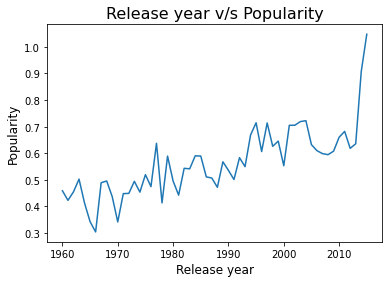

In [32]:
#We group the mean popularity by release_year, and save it into the pop variable
pop = dff.groupby(["release_year"])['popularity'].mean()

#Plot the data
plt.plot(pop)
plt.title('Release year v/s Popularity',fontsize = 16)
plt.xlabel('Release year', size=12)
plt.ylabel('Popularity', size=12);

> There is a slight tendency for popularity to increase as the years go by (maybe the new generations are less critical?).

<a id='10'></a>
### *Does higher revenue ensure greater popularity?*

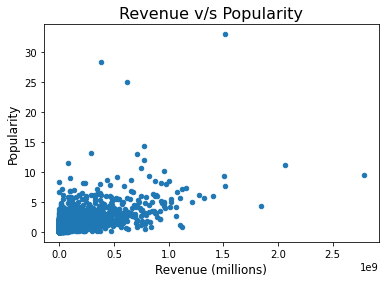

In [33]:
#Plot a scatter graph of the "revenue" and "popularity" columns from dff dataframe
dff.plot(x='revenue', y='popularity', kind='scatter')
plt.title('Revenue v/s Popularity',fontsize = 16)
plt.xlabel('Revenue (millions)', size=12)
plt.ylabel('Popularity', size=12);

> There does not seem to be a relationship between revenue and popularity.

<a id='11'></a>
### *Popularity by director and cast*

In [34]:
#We group the mean popularity by director (from the df_split_director dataframe), we order from highest to lowest, and display the first 10
print(df_split_director.groupby(["director_split"])["popularity"].mean().sort_values(ascending = False).head(10), "\n")

#We group the mean popularity by cast (from the df_split_cast dataframe), we order from highest to lowest, and display the first 10
print(df_split_cast.groupby(["cast_split"])["popularity"].mean().sort_values(ascending = False).head(10))


director_split
Colin Trevorrow       16.696886
Chad Stahelski        11.422751
David Leitch          11.422751
Juno John Lee          8.411577
Alan Taylor            6.883129
Peter Richardson       6.668990
Christopher Nolan      6.195521
Alex Garland           6.118847
Patrick Tatopoulos     5.806897
Wes Ball               5.553082
Name: popularity, dtype: float64 

cast_split
Josh Helman         28.419936
Daisy Ridley        11.173104
Hugh Keays-Byrne    10.211471
Daniel Henney        8.691294
Ryan Potter          8.691294
Brian Dobson         8.411577
Gloria Foster        7.753899
Ansel Elgort         7.703183
Ki Hong Lee          7.137273
Blake Cooper         7.137273
Name: popularity, dtype: float64


> This is not a good analysis really, as the number of films made by each director/casting differs greatly from one another. Anyway, it will be left to show the data.

<a id='a_budget'></a>
### * **About revenue, budget and profits**

<a id='12'></a>
### *Films with higher/lower profits*

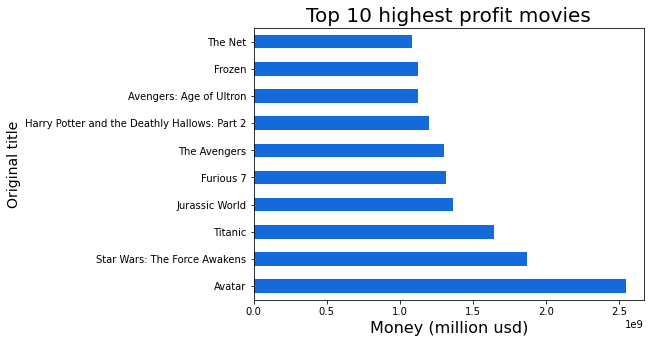

In [35]:
high_profit = pd.DataFrame(dff['profit'].sort_values(ascending = False))
high_profit['original_title'] = dff['original_title']
high_profit = high_profit.head(10)

#Plot the data
high_profit.plot(x="original_title", y="profit", kind="barh",figsize=(7,5), color="#146AD8", legend=None )
plt.title('Top 10 highest profit movies',fontsize = 20)
plt.xlabel("Money (million usd)", fontsize = 16)
plt.ylabel('Original title', fontsize = 14);

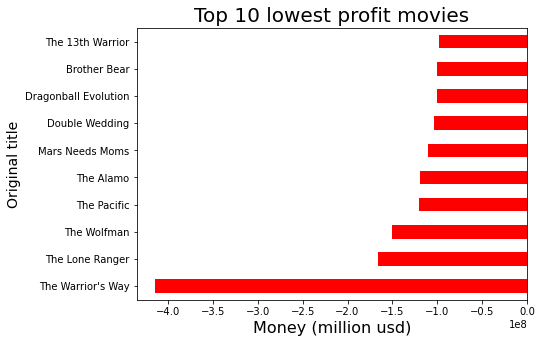

In [36]:
low_profit = pd.DataFrame(dff['profit'].sort_values(ascending = True))
low_profit['original_title'] = dff['original_title']
low_profit = low_profit.head(10)

#Plot the data
low_profit.plot(x="original_title", y="profit", kind="barh",figsize=(7,5), color="r", legend=None )
plt.title('Top 10 lowest profit movies',fontsize = 20)
plt.xlabel("Money (million usd)", fontsize = 16)
plt.ylabel('Original title', fontsize = 14);

<a id='13'></a>
### *Does a higher budget ensure a higher profit?*

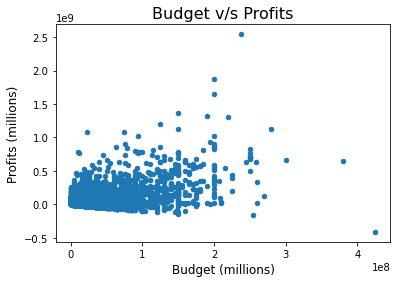

In [37]:
#Plot a scatter graph of the "budget" and "profit" columns from dff dataframe
dff.plot(x='budget', y='profit', kind='scatter')
plt.title('Budget v/s Profits',fontsize = 16)
plt.xlabel('Budget (millions)', size=12)
plt.ylabel('Profits (millions)', size=12);

> Apparently, there does not seem to be a strong relationship between budget and profit. It would be necessary to analyze with advanced tools (linear correlation) to see if this is confirmed.

<a id='14'></a>
### *Relationship between budget and revenues*

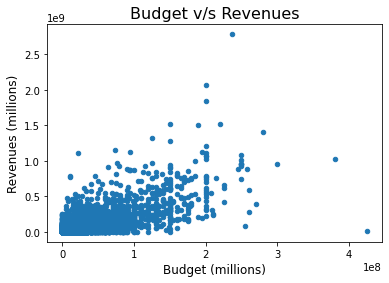

In [38]:
#Plot a scatter graph of the "budget" and "revenue" columns from dff dataframe
dff.plot(x='budget', y='revenue', kind='scatter')
plt.title('Budget v/s Revenues',fontsize = 16)
plt.xlabel('Budget (millions)', size=12)
plt.ylabel('Revenues (millions)', size=12);

> Here we can see a positive relationship between budget and income. This does not necessarily translate into positive benefits.

<a id='15'></a>
### *Profits over the years*

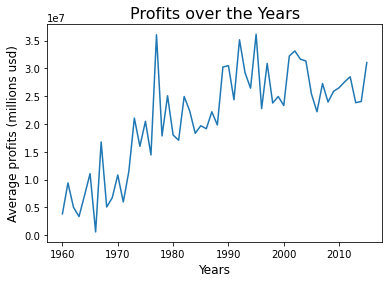

In [39]:
#We group the mean profit by release_year, and save it into the prof variable
prof = dff.groupby('release_year')['profit'].mean()

#Plot the data
plt.plot(prof)
plt.title('Profits over the Years', size=16);
plt.xlabel('Years', size=12)
plt.ylabel('Average profits (millions usd)', size=12);

> Profits from making movies have increased over the years (maybe it's a good time to make a movie).

<a id='16'></a>
### *Budget over the years*

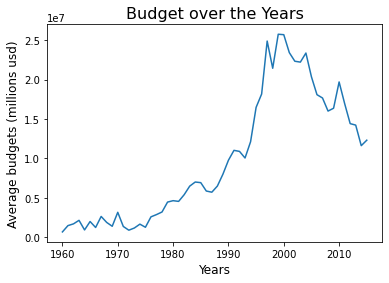

In [40]:
#We group the mean budget by release_year, and save it into the bud variable
bud = dff.groupby('release_year')['budget'].mean()

#Plot the data
plt.plot(bud)
plt.title('Budget over the Years', size=16);
plt.xlabel('Years', size=12)
plt.ylabel('Average budgets (millions usd)', size=12);

> There is an increase in film budgets until 2000, when a decrease can be seen. 

<a id='17'></a>
### *Revenue over the years*

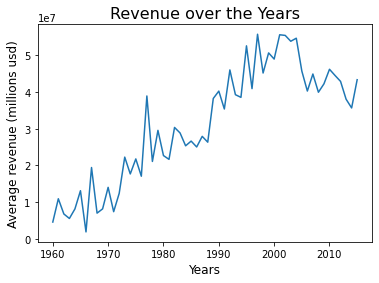

In [41]:
#We group the mean revenue by release_year, and save it into the rev variable
rev = dff.groupby('release_year')['revenue'].mean()

#Plot the data
plt.plot(rev)
plt.title('Revenue over the Years', size=16);
plt.xlabel('Years', size=12)
plt.ylabel('Average revenue (millions usd)', size=12);

> Similar to the budget graph, there is a rise until 2010, and then there is a less strong decline than the income graph. 

<a id='18'></a>
### *Number of films made by year*

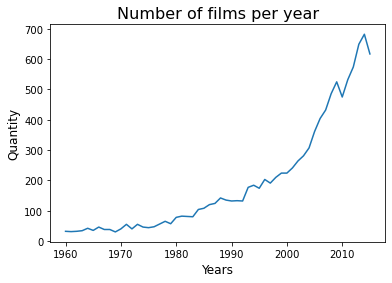

In [42]:
#We group the count of every movie by release_year, and save it into the can variable
can = dff.groupby(['release_year'])["release_year"].count()

#Plot the data
plt.plot(can);
plt.title('Number of films per year', size=16);
plt.xlabel('Years', size=12)
plt.ylabel('Quantity', size=12);

<a id='a_others'></a>
### * **Other interesting data**

<a id='19'></a>
### *Which actors have appeared in the most films?*

In [43]:
#From the df_split_cast dataframe, we count the actors and show the 15 with the most acted films.
df_split_cast['cast_split'].value_counts().head(15)

Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
Morgan Freeman        49
John Goodman          49
Susan Sarandon        48
Liam Neeson           48
Julianne Moore        47
Alec Baldwin          47
Johnny Depp           46
Christopher Walken    46
Name: cast_split, dtype: int64

<a id='20'></a>
### *Which directors have directed the most films?*

In [44]:
#From the df_split_director dataframe, we count the directors and show the 15 with the most directed films.
df_split_director['director_split'].value_counts().head(15)

Woody Allen             46
Clint Eastwood          34
Martin Scorsese         30
Steven Spielberg        30
Ridley Scott            23
Steven Soderbergh       23
Ron Howard              22
Joel Schumacher         21
Brian De Palma          20
Tim Burton              19
Francis Ford Coppola    19
David Cronenberg        19
Wes Craven              19
Robert Rodriguez        19
John Carpenter          19
Name: director_split, dtype: int64

<a id='21'></a>
### *Which production companies have directed the films?*

In [45]:
#From the df_split_production dataframe, we count the companies and show the 15 with the most films.
df_split_production['production_split'].value_counts().head(15)

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      213
Touchstone Pictures                       178
Columbia Pictures Corporation             160
TriStar Pictures                          147
Miramax Films                             139
Relativity Media                          108
Regency Enterprises                        95
Canal+                                     92
Name: production_split, dtype: int64

<a id='conclusions'></a>
## Conclusions

It is interesting to see that over the years, the popularity of movies shows a rise, even though the length of these have been reduced and since 2000, both the budget and revenue has been reduced, I think this is because the new generations are less critical when watching a movie, due to greater ease of viewing (thanks to the internet especially), so the industry has prioritized making many more movies, with a lower budget in each of them. 
	The other conclusions are the typical ones: the drama genre is the most popular, well-known companies and directors have the most films, and the longest film lasts 15 hours!!!!!!.



### Some limitations of this analysis: 
Although an analysis has been performed that attempts to represent most of the data and some of the most interesting things, it's necessary to clarify that there are some limitations of both the analysis and the dataset:
- The analysis performed is limited to analyzing how a data set evolves, or how two variables are related. A better analysis could be performed with advanced tools (correlation coefficient, moving average, among others).
- Although there is a large amount of data to analyze, many of them are meaningless, for example: movies with 0 minutes of duration, 0 budget or 0 revenue.
- Statistical analysis has not been performed, although the questions answered did not require this type of analysis, it's reported for general knowledge.
